In [0]:
#sudo -H pip3 uninstall harmony
#sudo -H pip3 uninstall palantir

!pip install scanpy[louvain]

     |████████████████████████████████| 1.9MB 9.4MB/s 
     |████████████████████████████████| 3.6MB 55.9MB/s 
     |████████████████████████████████| 13.0MB 188kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 378kB 52.4MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1026351 sha256=9f3a8d15fe6544eea8f3abbd8d6909dcf259e6c192e4a6751cc2a112c960cee2
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2213277 sha256=b81a340641e1c80b8de1196b4f8c3447f1f8896daae505e409dc252d9a7826cb
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built louvain python-igraph
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5

In [0]:
#@title Mount Google Drive 

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

# Set up data folder
from pathlib import Path

DATA = Path("/content/drive/My Drive/Senior Design/Genomics")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

 	
print("Current Working Directory " , os.getcwd())

os.chdir("/content/drive/My Drive/Senior Design/Genomics/Harmony-0.1/Harmony-0.1/")

!python setup.py install


Current Working Directory  /content
  Cloning https://github.com/dpeerlab/Palantir.git to /tmp/pip-req-build-pspnt52m
  Running command git clone -q https://github.com/dpeerlab/Palantir.git /tmp/pip-req-build-pspnt52m
     |████████████████████████████████| 4.7MB 4.7MB/s 
     |████████████████████████████████| 163kB 41.5MB/s 
     |████████████████████████████████| 1.9MB 41.7MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 3.6MB 35.7MB/s 
  Created wheel for palantir: filename=palantir-0.2.1-cp36-none-any.whl size=24247 sha256=36a83c0a231175eaf52edca5216424d098d4c010693a9aab042ca1af43c72c30
  Stored in directory: /tmp/pip-ephem-wheel-cache-1c91og89/wheels/48/f7/26/68e51d0b758346468365c4164ff2663cfe4f98c8eab97b78d2
  Created wheel for fcsparser: filename=fcsparser-0.2.0-cp36-none-any.whl size=4736079 sha256=6ab4009a4aafaed0bc76cc3317d53d5d089512ab688a55eebeed3be17243ee0c
  Stored in directory: /root/.cache/pip/wheels/bb/36/17/b51b45e84

'\n!git clone git://github.com/dpeerlab/Palantir.git\n!cd Palantir\n!sudo -H pip3 install .\n'

In [0]:
os.chdir("/content/drive/My Drive/Senior Design/Genomics/Harmony-0.1/Harmony-0.1/build/lib")


import harmony
import palantir

# Plotting and miscellaneous imports
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Initialize random seed
import random
random.seed(101)  # CHANGE

%matplotlib inline


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [0]:
# Load sample data

harmony_dir = os.path.expanduser(DATA)
csv_files = [harmony_dir + '/Lib1-3_E3.5.csv',
            harmony_dir + '/Lib1-4_E3.5.csv',
            harmony_dir + '/Lib1-1_E4.5.csv',
            harmony_dir + '/Lib1-2_E4.5.csv',]
sample_names = ['E3.5_Rep1', 'E3.5_Rep2', 'E4.5_Rep1', 'E4.5_Rep2']

counts = harmony.utils.load_from_csvs(csv_files, sample_names)
counts.head()

Loading count matrices...
E3.5_Rep1
E3.5_Rep2
E4.5_Rep1
E4.5_Rep2
Concatenating data..


,2310033P09RIK,ZFP626,UNC13D,CAD,TIMM10,AGO2,4921524J17RIK,ALDH7A1,DHRSX,ZSCAN18,CPNE5,ARAF,TARS2,MEST,GKAP1,GM29650,LY6C1,IPO7,PFKFB3,PARS2,ALKBH2,CTNS,FAM199X,DPPA5A,GM35339,CRXOS,EIF3F,PRR15L,ARRDC4,MTG2,SLC22A13,SETX,ZFP771,RGS3,USP44,NMNAT2,POU4F1,9430015G10RIK,WSB2,PLEKHM3,...,SREBF2,FGF3,SRP19,MTOR,NHP2,MXRA8,COL6A5,DEGS1,VMP1,EMC2,CCPG1OS,TNIK,HIST1H4A,SH3BP5,UHRF1BP1L,CDK17,IL4I1,1810043G02RIK,XLR,TRIM13,SS18,MBNL3,UCHL5,BBS5,FKBP6,SPIRE1,POLR2E,CPSF2,LAMP3,TMEM14C,FNIP2,CFL2,TXN1,GM773,ZFP989,MAP3K15,MRGBP,GRB2,ACP2,1810032O08RIK
E3.5_Rep1_Lib1-3_E3.5_120703409121134,1,0,0,3,19,6,0,0,0,0,0,1,0,0,1,0,0,2,0,0,3,0,0,423,0,67,14,0,0,1,0,3,2,0,0,0,0,2,0,0,...,1,0,12,0,47,0,0,1,5,1,0,1,0,0,0,0,0,1,0,1,1,0,5,1,0,0,24,0,1,4,1,0,63,2,0,0,3,7,0,0
E3.5_Rep1_Lib1-3_E3.5_120703409412894,2,0,0,0,9,2,2,0,1,0,0,1,1,1,0,0,1,5,0,0,3,1,0,328,0,111,13,0,0,0,0,5,2,0,0,0,0,1,0,1,...,0,0,20,3,51,0,0,2,1,1,0,0,0,0,2,0,0,0,0,0,1,1,6,0,0,0,29,1,0,5,0,4,99,0,0,0,1,4,0,1
E3.5_Rep1_Lib1-3_E3.5_120726911864227,0,0,0,1,8,0,4,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,207,0,48,5,0,0,1,0,2,0,0,0,1,0,0,0,2,...,0,0,10,0,19,0,0,5,2,1,1,0,0,0,1,1,1,0,0,0,1,0,4,0,0,1,8,2,0,1,0,2,15,0,0,0,0,0,0,0
E3.5_Rep1_Lib1-3_E3.5_120772961651102,0,0,0,2,3,7,1,0,0,0,0,1,2,0,6,0,0,15,0,0,3,0,0,96,0,52,15,0,0,1,0,3,1,0,0,0,0,2,0,0,...,1,0,11,0,54,0,0,2,0,0,0,0,0,0,4,0,0,0,1,3,1,0,3,0,0,0,12,3,0,0,0,2,23,0,0,0,0,0,0,1
E3.5_Rep1_Lib1-3_E3.5_121202343111005,0,0,0,1,5,1,2,0,0,0,0,2,1,1,6,0,0,7,0,0,5,0,0,574,0,81,24,0,0,6,0,6,1,0,0,0,0,1,0,1,...,0,0,11,0,33,0,0,0,1,0,1,0,1,0,2,2,0,5,0,0,2,0,12,0,2,1,24,2,1,3,0,2,27,0,0,0,0,3,0,1


In [0]:

#harmony package normalization: divides the counts of each cell by the total molecules detected as a normalization technique
norm_df = harmony.utils.normalize_counts(counts)
norm_df

,2310033P09RIK,ZFP626,UNC13D,CAD,TIMM10,AGO2,4921524J17RIK,ALDH7A1,DHRSX,ZSCAN18,CPNE5,ARAF,TARS2,MEST,GKAP1,GM29650,LY6C1,IPO7,PFKFB3,PARS2,ALKBH2,CTNS,FAM199X,DPPA5A,GM35339,CRXOS,EIF3F,PRR15L,ARRDC4,MTG2,SLC22A13,SETX,ZFP771,RGS3,USP44,NMNAT2,POU4F1,9430015G10RIK,WSB2,PLEKHM3,...,SREBF2,FGF3,SRP19,MTOR,NHP2,MXRA8,COL6A5,DEGS1,VMP1,EMC2,CCPG1OS,TNIK,HIST1H4A,SH3BP5,UHRF1BP1L,CDK17,IL4I1,1810043G02RIK,XLR,TRIM13,SS18,MBNL3,UCHL5,BBS5,FKBP6,SPIRE1,POLR2E,CPSF2,LAMP3,TMEM14C,FNIP2,CFL2,TXN1,GM773,ZFP989,MAP3K15,MRGBP,GRB2,ACP2,1810032O08RIK
E3.5_Rep1_Lib1-3_E3.5_120703409121134,0.193386,0.000000,0.0,0.580159,3.674338,1.160317,0.000000,0.000000,0.000000,0.0,0.000000,0.193386,0.000000,0.000000,0.193386,0.0,0.000000,0.386772,0.0,0.000000,0.580159,0.000000,0.000000,81.802359,0.000000,12.956875,2.707407,0.000000,0.000000,0.193386,0.0,0.580159,0.386772,0.000000,0.0,0.000000,0.0,0.386772,0.000000,0.000000,...,0.193386,0.000000,2.320634,0.000000,9.089151,0.000000,0.0,0.193386,0.966931,0.193386,0.000000,0.193386,0.000000,0.000000,0.000000,0.000000,0.000000,0.193386,0.000000,0.193386,0.193386,0.000000,0.966931,0.193386,0.000000,0.000000,4.641269,0.000000,0.193386,0.773545,0.193386,0.000000,12.183330,0.386772,0.000000,0.000000,0.580159,1.353703,0.000000,0.000000
E3.5_Rep1_Lib1-3_E3.5_120703409412894,0.396975,0.000000,0.0,0.000000,1.786388,0.396975,0.396975,0.000000,0.198488,0.0,0.000000,0.198488,0.198488,0.198488,0.000000,0.0,0.198488,0.992438,0.0,0.000000,0.595463,0.198488,0.000000,65.103908,0.000000,22.032115,2.580338,0.000000,0.000000,0.000000,0.0,0.992438,0.396975,0.000000,0.0,0.000000,0.0,0.198488,0.000000,0.198488,...,0.000000,0.000000,3.969751,0.595463,10.122864,0.000000,0.0,0.396975,0.198488,0.198488,0.000000,0.000000,0.000000,0.000000,0.396975,0.000000,0.000000,0.000000,0.000000,0.000000,0.198488,0.198488,1.190925,0.000000,0.000000,0.000000,5.756138,0.198488,0.000000,0.992438,0.000000,0.793950,19.650265,0.000000,0.000000,0.000000,0.198488,0.793950,0.000000,0.198488
E3.5_Rep1_Lib1-3_E3.5_120726911864227,0.000000,0.000000,0.0,0.368528,2.948222,0.000000,1.474111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.105583,0.0,0.000000,0.368528,0.000000,0.000000,76.285240,0.000000,17.689331,1.842639,0.000000,0.000000,0.368528,0.0,0.737055,0.000000,0.000000,0.0,0.368528,0.0,0.000000,0.000000,0.737055,...,0.000000,0.000000,3.685277,0.000000,7.002027,0.000000,0.0,1.842639,0.737055,0.368528,0.368528,0.000000,0.000000,0.000000,0.368528,0.368528,0.368528,0.000000,0.000000,0.000000,0.368528,0.000000,1.474111,0.000000,0.000000,0.368528,2.948222,0.737055,0.000000,0.368528,0.000000,0.737055,5.527916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E3.5_Rep1_Lib1-3_E3.5_120772961651102,0.000000,0.000000,0.0,0.520847,0.781270,1.822964,0.260423,0.000000,0.000000,0.0,0.000000,0.260423,0.520847,0.000000,1.562541,0.0,0.000000,3.906352,0.0,0.000000,0.781270,0.000000,0.000000,25.000651,0.000000,13.542019,3.906352,0.000000,0.000000,0.260423,0.0,0.781270,0.260423,0.000000,0.0,0.000000,0.0,0.520847,0.000000,0.000000,...,0.260423,0.000000,2.864658,0.000000,14.062866,0.000000,0.0,0.520847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.041694,0.000000,0.000000,0.000000,0.260423,0.781270,0.260423,0.000000,0.781270,0.000000,0.000000,0.000000,3.125081,0.781270,0.000000,0.000000,0.000000,0.520847,5.989739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260423
E3.5_Rep1_Lib1-3_E3.5_121202343111005,0.000000,0.000000,0.0,0.182216,0.911079,0.182216,0.364431,0.000000,0.000000,0.0,0.000000,0.364431,0.182216,0.182216,1.093294,0.0,0.000000,1.275510,0.0,0.000000,0.911079,0.000000,0.000000,104.591837,0.000000,14.759475,4.373178,0.000000,0.000000,1.093294,0.0,1.093294,0.182216,0.000000,0.0,0.000000,0.0,0.182216,0.000000,0.182216,...,0.000000,0.000000,2.004373,0.000000,6.013120,0.000000,0.0,0.000000,0.182216,0.000000,0.182216,0.000000,0.182216,0.000000,0.364431,0.364431,0.000000,0.911079,0.000000,0.000000,0.364431,

In [0]:
print(len(counts.index))

counts.drop_duplicates()
print(len(set(counts.index)))

902
902


In [0]:
#selecting highly variable genes

limit=900 #designate top number of variable genes to select

mean = norm_df.mean()
var = norm_df.var()
sorted_var=var.sort_values() #sorted in ASCENDING ORDER
rev_sorted_var= sorted_var[::-1] #correctly sorted in descending order
highly_variable_genes=rev_sorted_var[0:limit] #selecting top 900 genes
hvg_rows=highly_variable_genes.index.values #array of highly variable gene names
hvg_genes=norm_df[hvg_rows] #basically norm_df, but keeping columns corresponding to top 900 variable genes


In [0]:
#Code to see where a gene lies among the list of sorted values
j=0
for i in rev_sorted_var.index.values:
  if i=='FGF4':
    print("Gene number among variable genes:", j)
    if j>limit:
      print("Gene falls {} short of top {} genes".format(j-limit, limit))
    #break
  else:
    j+=1


Gene number among variable genes: 1457
Gene falls 557 short of top 900 genes


In [0]:
#log transform to exhibit stronger signal
limit=901
data_df = harmony.utils.log_transform(norm_df.loc[:,hvg_genes.columns[1:limit]])
#limit must be less than number of rows (902) for PCA to work

data_df

,MT-CO3,MT-ND1,MT-CYTB,MT-CO1,MT-CO2,DPPA5A,MALAT1,HSP90AA1,RPL41,GABARAPL2,PTMA,MT-ND4,RPS29,FTL1,HSP90AB1,RPLP1,MAP1LC3B,ACTB,H2AFZ,MT-ND2,EIF2S2,HSPA8,GM10076,PPIA,RPS4X,RPS27A,NPM1,RPL39,RPS28,RPS8,CTSL,CALCOCO2,RPL10,RPL13,RPL37A,RPS20,RPS2,RPLP0,RPS3,EEF1A1,...,ATP6AP2,ACP1,SRP19,TDH,TTC1,CREG1,H2-D1,SLC24A5,PSMD13,GM2A,SIVA1,IPO7,LMAN2,SON,SELENOT,COX7A2L,RHOA,TALDO1,SRRM1,PSMD2,HEXA,CNN3,TMCO1,PFDN1,EMC8,DNAJC19,NDUFA11,IFI30,POLR2L,SFR1,SRSF5,PRR13,EED,SF3B2,CETN3,GLIPR2,AK2,DCUN1D5,PAIP2,NUDT21
E3.5_Rep1_Lib1-3_E3.5_120703409121134,6.231391,5.478287,5.394542,5.908086,5.503106,6.355833,6.765310,5.319674,6.300273,5.521444,5.870430,4.624104,6.422403,5.180435,5.609794,6.015493,5.269925,3.685210,4.947124,3.727949,5.802070,5.195741,4.743477,5.319674,5.269925,5.776849,5.401159,5.034844,4.764159,6.135436,1.024222,3.344272,5.312671,5.836654,5.580941,5.660318,5.262676,4.974004,5.195741,4.947124,...,0.333787,2.056968,1.275385,-1.038681,1.489238,-3.321928,-0.556057,-0.195046,1.024222,-3.321928,1.916223,-1.038681,1.275385,1.585344,0.539733,1.489238,1.024222,1.386270,1.760249,0.880079,1.386270,-0.556057,-0.195046,1.585344,1.155262,1.840343,1.585344,-1.769127,1.386270,0.333787,1.024222,-0.556057,1.275385,1.760249,1.760249,-0.556057,1.275385,0.719919,1.275385,0.719919
E3.5_Rep1_Lib1-3_E3.5_120703409412894,5.940934,5.903153,5.793844,5.917437,5.540588,6.026887,4.780902,5.285534,6.160991,5.788673,6.507910,4.706081,6.389941,6.358877,5.146931,5.893551,5.328925,3.325441,5.641557,4.738623,5.509495,3.435405,4.638708,4.975494,3.806750,5.652984,5.321784,5.300143,4.506372,5.907930,1.191160,3.722485,4.455073,5.964054,5.270775,5.477716,5.138826,5.647282,5.002545,4.388272,...,-1.008755,0.915626,2.024940,-3.321928,1.422415,-1.744257,0.915626,-1.744257,1.191160,-0.161734,1.876871,0.127551,0.368405,1.191160,1.191160,1.525480,2.093641,1.422415,2.448680,0.127551,1.311416,0.127551,0.755230,1.191160,0.755230,1.525480,1.796717,-0.161734,1.422415,1.711847,1.525480,-0.523955,0.915626,0.915626,1.311416,-3.321928,1.525480,1.422415,1.311416,1.711847
E3.5_Rep1_Lib1-3_E3.5_120726911864227,5.264044,6.154329,5.722451,5.540229,5.264044,6.255222,5.421197,6.116515,5.771941,5.551609,5.919782,4.831707,6.037776,5.277814,5.023718,5.103207,4.588223,5.421197,5.469994,4.321964,5.331616,5.433552,4.496986,5.469994,4.653053,5.291454,5.408735,4.755022,4.028147,5.291454,1.920399,4.610158,5.023718,5.408735,5.433552,4.348305,5.481940,5.562900,5.071935,5.118593,...,0.958018,0.654537,1.920399,0.269731,1.422068,-0.256605,-3.321928,0.269731,1.607968,-3.321928,0.654537,0.269731,0.958018,-0.256605,0.269731,1.920399,2.177067,0.958018,1.772625,1.772625,1.772625,0.958018,-0.256605,0.958018,0.958018,0.654537,1.422068,-3.321928,1.772625,-0.256605,0.269731,-0.256605,1.422068,1.772625,0.958018,-3.321928,2.290088,1.208621,0.958018,2.054434
E3.5_Rep1_Lib1-3_E3.5_120772961651102,5.950010,6.482610,6.110869,6.220738,5.654256,4.649653,6.905625,5.997829,6.838270,6.088958,7.090657,5.593304,5.906828,6.066710,5.272123,6.110869,5.096577,3.162596,4.664544,5.445949,5.669100,4.067561,5.393285,3.713825,3.926432,5.553859,4.491623,4.934023,4.556927,5.329311,0.733390,4.491623,3.358469,5.608785,5.017588,5.017588,5.051971,5.118373,4.474825,4.572801,...,0.487607,1.435220,1.567866,-0.182343,2.093146,1.126568,0.943332,1.126568,0.733390,0.191176,0.733390,2.002289,1.289133,1.126568,0.733390,2.093146,0.733390,0.191176,1.289133,1.905323,-0.182343,0.487607,1.289133,-0.687691,0.487607,0.191176,1.567866,-1.472235,1.126568,0.191176,0.943332,2.543327,0.191176,1.567866,0.943332,-3.321928,1.801368,0.487607,0.733390,1.801368
E3.5_Rep1_Lib1-3_E3.5_121202343111005,5.770367,5.634090,5.015791,5.569129,5.140273,6.710005,5.765542,5.863612,5.859090,5.558012,6.346394,4.121885,6.057640,5.822396,5.459890,5.541175,4.914832,2.849282,5.541175,3.802027,5.585646,4.166486,4.345251,5.354605,4.906091,5.836266,5.591110,4.957760,4.433057,5.968091,0.015895,4.265486,4.852503,5.779967,5.047933,5.341697,5.177069,5.716391,5.341697,5.102514,...,-1.8251

In [0]:
#determine time point at which each cell was measured for dataset
tp = pd.Series(index=data_df.index)
for t in ['E3.5', 'E4.5']:
    cells = data_df.index[data_df.index.str.contains(t)]
    tp[cells] = t

In [0]:
#determine time point connections between E3.5 and E4.5
timepoint_connections = pd.DataFrame(columns=[0, 1])
index = 0
timepoint_connections.loc[index, :] = ['E3.5', 'E4.5']; index += 1
timepoint_connections

,0,1
0,E3.5,E4.5


In [0]:
#compute augmented and non-augmented affinity matrices
aug_aff, aff = harmony.core.augmented_affinity_matrix(data_df, tp, timepoint_connections)

Running PCA with 166 components
Nearest neighbor computation...
Constucting affinities between E3.5 and E4.5...
t+1 neighbors of t...
t neighbors of t+1...


In [0]:
#force directed layout visualization
layout = harmony.plot.force_directed_layout(aug_aff, data_df.index)

100%|██████████| 500/500 [00:03<00:00, 141.90it/s]

BarnesHut Approximation  took  1.17  seconds
Repulsion forces  took  1.88  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  0.10  seconds


In [0]:
#load precomputed tSNE projections
layout = pd.read_pickle(harmony_dir + '/e35_e45_layout.p')

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


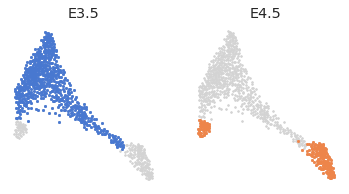

In [0]:
#visualize different time points
harmony.plot.plot_timepoints(layout, tp) 

In [0]:
#project data onto diffusion map with affinity matrix from Harmony as input
dm_res = palantir.utils.run_diffusion_maps(aug_aff)
ms_data = palantir.utils.determine_multiscale_space(dm_res)
ms_data.index = data_df.index

In [0]:
# Start cell
start_cell = 'E3.5_Rep2_Lib1-4_E3.5_192121092393820'
# Terminal cells
terminal_cells = [ 'E4.5_Rep1_Lib1-1_E4.5_161864255428444',
    'E4.5_Rep2_Lib1-2_E4.5_239475375884140']

pr_res = palantir.core.run_palantir(ms_data, start_cell, terminal_cells,
                use_early_cell_as_start=True)

Sampling and flocking waypoints...
Time for determining waypoints: 0.003953206539154053 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.13559747139612835 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [0]:
#renaming branch probabilities
pr_res.branch_probs.columns = ['PrE', 'EPI']

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


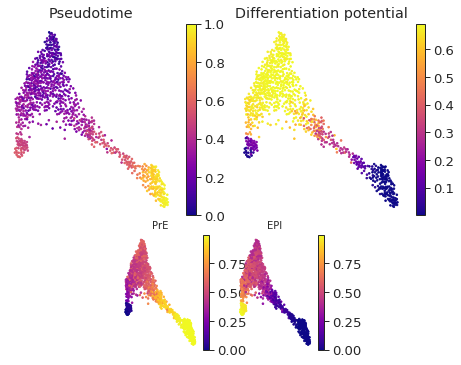

In [0]:
#visualize palantir results
palantir.plot.plot_palantir_results(pr_res, layout) 

In [0]:
#MAGIC algorithm implementation to impute data for visualization
imp_df = palantir.utils.run_magic_imputation(data_df, dm_res)

The following genes were either not observed in the experiment, or the wrong gene symbol was used: {'FGF4'}


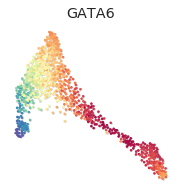

In [0]:
#expression of EPI gene FGF4 and PrE gene GATA6 visualization
palantir.plot.plot_gene_expression(imp_df, layout, ["FGF4",	"GATA6"])


The following genes were either not observed in the experiment, or the wrong gene symbol was used: {'GATA4', 'FGF4'}


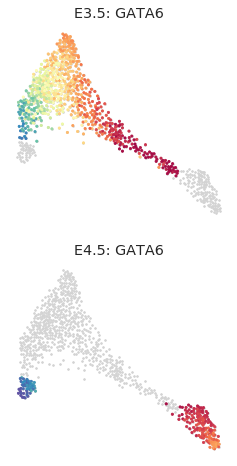

In [0]:
#time point gene expression visualization
harmony.plot.plot_tp_gene_expression(imp_df, layout, ["FGF4",	"GATA4",	"GATA6"], tp) 


References:

https://github.com/dpeerlab/Harmony

https://github.com/dpeerlab/Palantir 

https://github.com/KrishnaswamyLab/MAGIC
